## this is the section we want to preproccess or clean our data

i have to mention that we want to use decision tree classifier randomforest classifier k-nearest neighbors and support vector machine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
data=pd.read_csv(r'D:\good book\data science\Data science project\real project\water quality\main data\water_potability.csv')

In [4]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [6]:
data.describe(include='all')

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

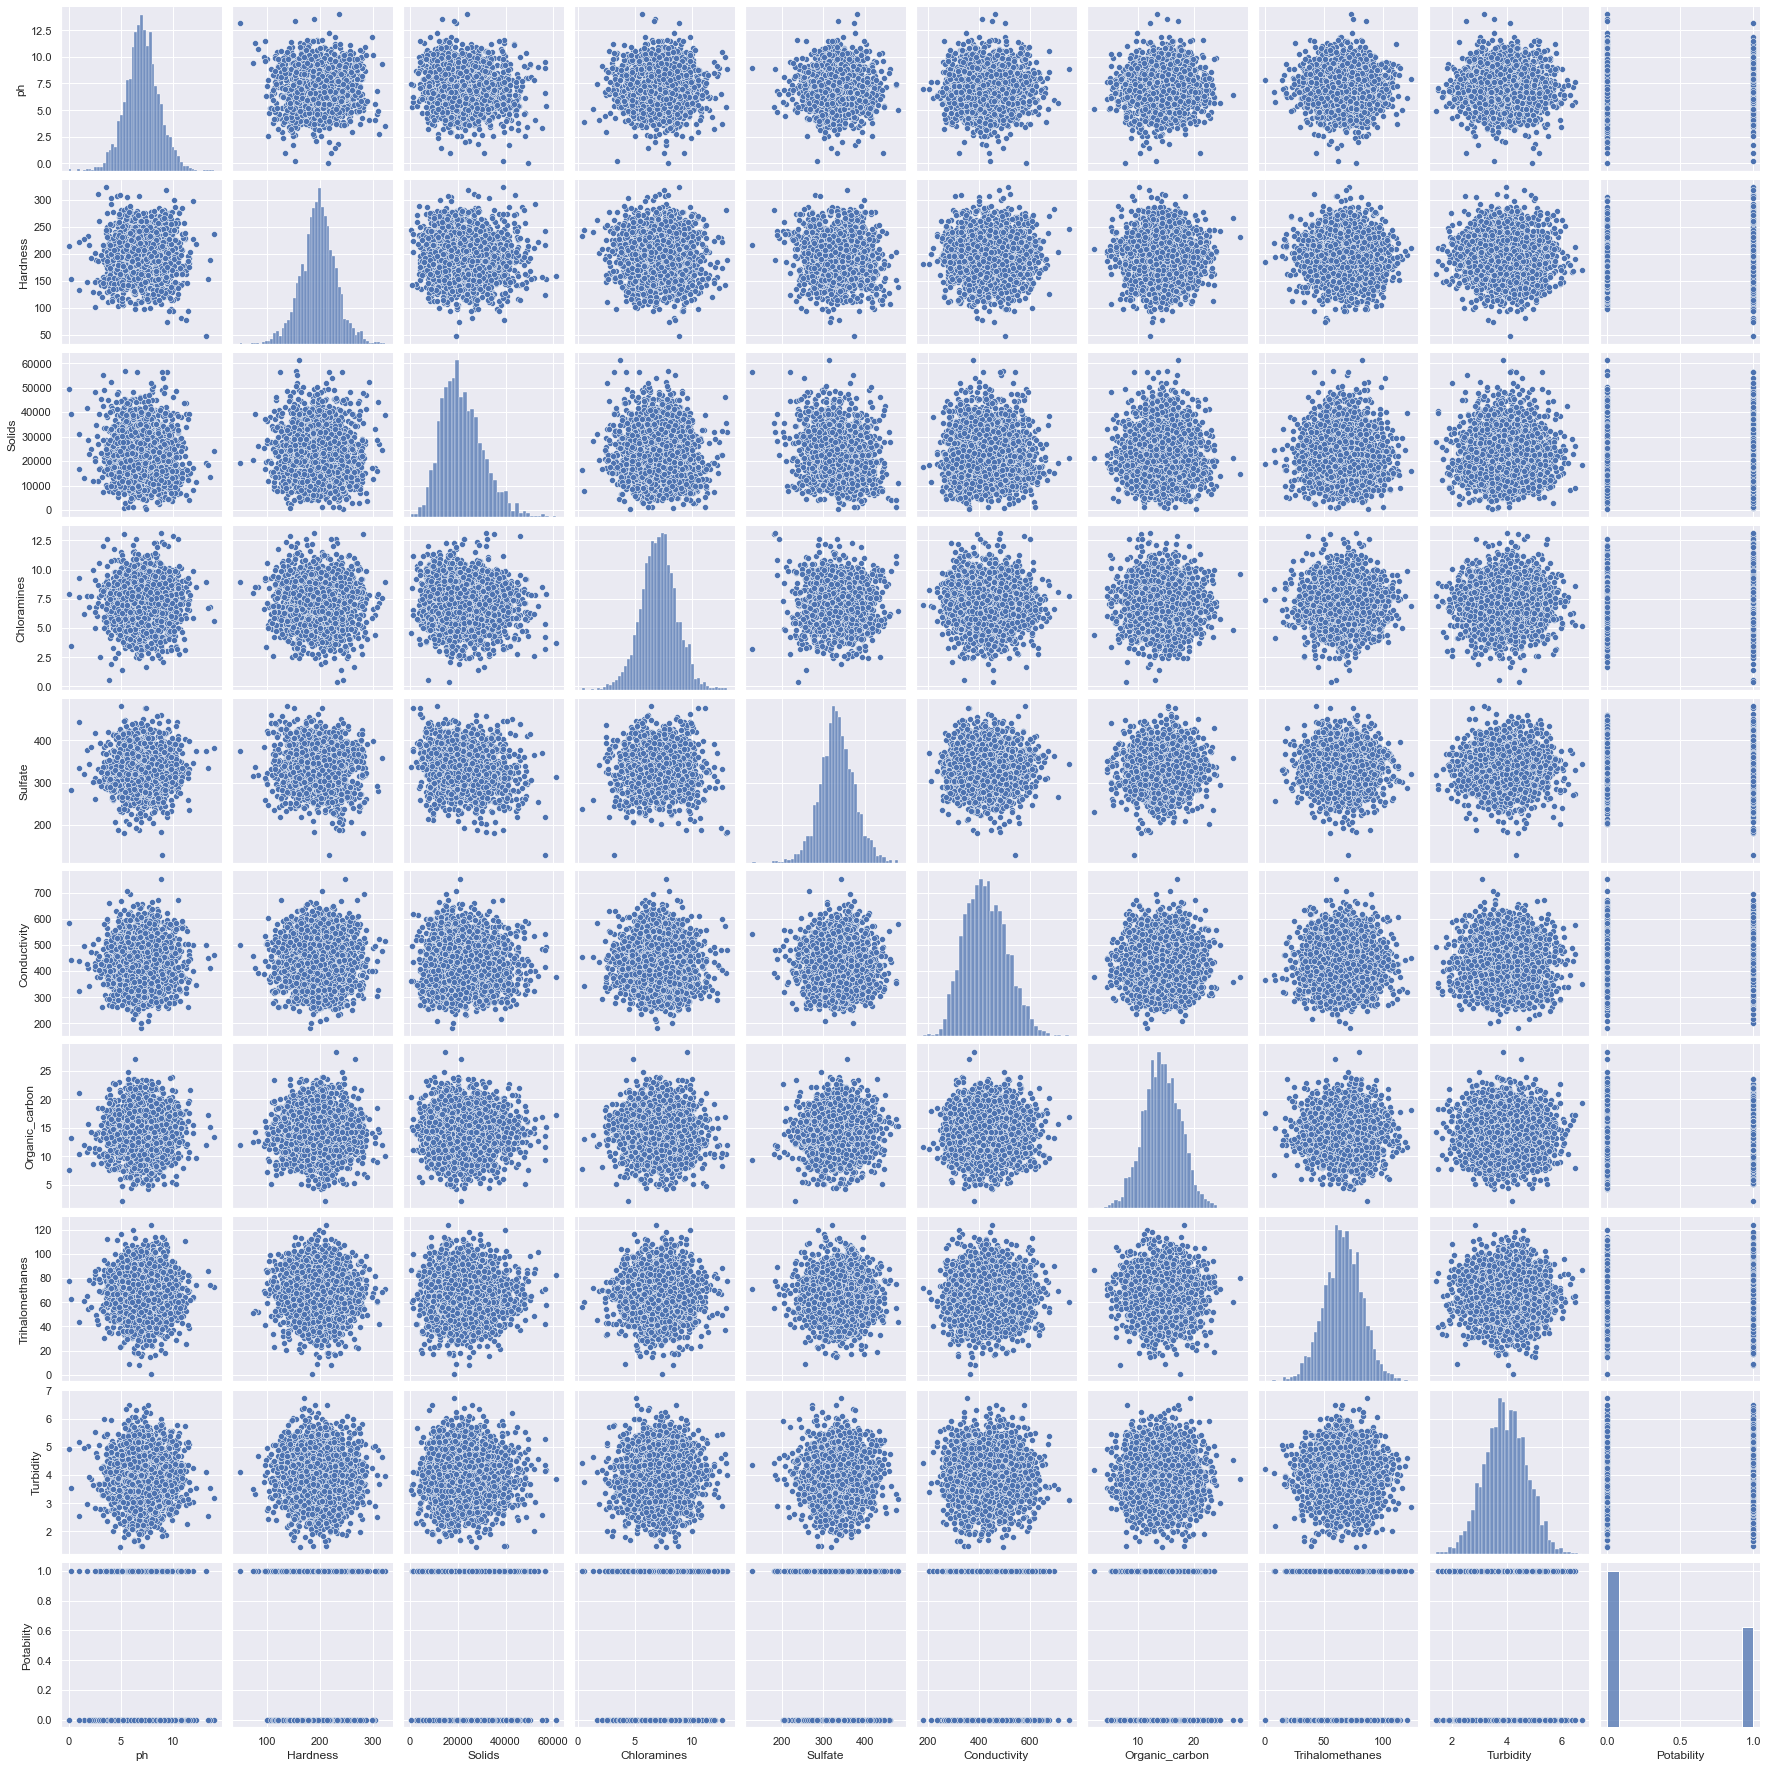

In [8]:
sns.pairplot(data=data)

since all the data are numeric we just want to handle the missing data and outliers

## this part belongs to the missing data

(array([  4.,  12.,  84., 353., 915., 898., 382., 116.,  17.,   4.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

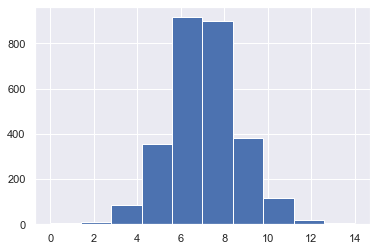

In [13]:
#we start it with PH
plt.hist(x=data['ph'])
# as you can see it is quite normal 
# so we can impute it with the mean of the ph column

(array([  1.,   5.,  23., 112., 431., 871., 673., 289.,  78.,  12.]),
 array([129.        , 164.20306423, 199.40612846, 234.60919269,
        269.81225692, 305.01532115, 340.21838538, 375.42144961,
        410.62451384, 445.82757808, 481.03064231]),
 <BarContainer object of 10 artists>)

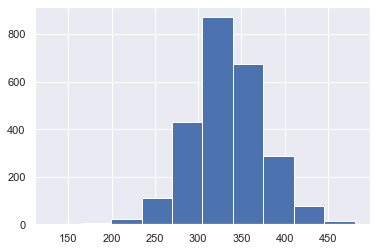

In [15]:
#now it is time for the sulfate
plt.hist(x=data['Sulfate'])
# as you can see it is quite normal too as well as the ph column
#so we can impute it wiht the mean too 

(array([  3.,  23., 103., 347., 746., 949., 655., 223.,  55.,  10.]),
 array([  0.738 ,  13.0642,  25.3904,  37.7166,  50.0428,  62.369 ,
         74.6952,  87.0214,  99.3476, 111.6738, 124.    ]),
 <BarContainer object of 10 artists>)

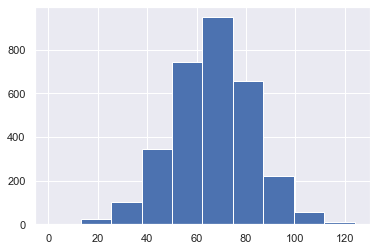

In [16]:
#now lets check the Tri....
plt.hist(x=data['Trihalomethanes'])
# as you can see it is quite normal too as well as the ph column
#so we can impute it wiht the mean too 

###  since we are done with missing data lets check out imputer from sklearn

for imputing the missing values we will use single imputer  multivariate imputer and knn imputer 

In [19]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [20]:
kn=KNNImputer(n_neighbors=5, weights="distance")
si=SimpleImputer(strategy='mean')
it=IterativeImputer(max_iter=10, random_state=0)

## the missing coulmns are `ph` and `Sulfate` and `Trihalomethanes`

In [21]:
mdkn=data
mdsi=data
mdi=data

In [22]:
mdi.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [23]:
mdkn=kn.fit_transform(mdkn)

In [30]:
mdkn=pd.DataFrame(data=mdkn,columns=data.columns)

In [32]:
mdkn.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [33]:
mdi=it.fit_transform(mdi)

In [34]:
type(mdi)

numpy.ndarray

In [35]:
mdi=pd.DataFrame(data=mdi,columns=data.columns)

In [37]:
mdi.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [38]:
mdsi=si.fit_transform(mdsi)

In [39]:
mdsi=pd.DataFrame(data=mdsi,columns=data.columns)

In [41]:
mdsi.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## check point 
now we can save our datasets which dont contain nan anymore

In [42]:
mdsi.to_csv('mdsi_no_nan.csv')
mdkn.to_csv('mdkn_no_nan.csv')
mdi.to_csv('mdi_no_nan.csv')

In [2]:
mdsi=pd.read_csv('mdsi_no_nan.csv')
mdkn=pd.read_csv('mdkn_no_nan.csv')
mdi=pd.read_csv('mdi_no_nan.csv')

In [3]:
mdkn.isnull().sum()

Unnamed: 0         0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

before we go on to the classifying lets check out our data

(array([   4.,   12.,   84.,  362., 1134., 1140.,  403.,  116.,   17.,
           4.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

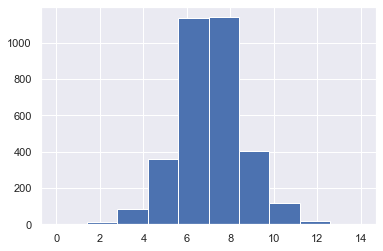

In [4]:
plt.hist(mdkn['ph'])

(array([   3.,   23.,  103.,  350.,  779., 1059.,  671.,  223.,   55.,
          10.]),
 array([  0.738 ,  13.0642,  25.3904,  37.7166,  50.0428,  62.369 ,
         74.6952,  87.0214,  99.3476, 111.6738, 124.    ]),
 <BarContainer object of 10 artists>)

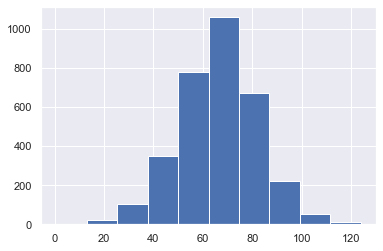

In [5]:
plt.hist(mdkn['Trihalomethanes'])

(array([1.000e+00, 5.000e+00, 2.300e+01, 1.160e+02, 4.910e+02, 1.305e+03,
        9.420e+02, 3.030e+02, 7.800e+01, 1.200e+01]),
 array([129.        , 164.20306423, 199.40612846, 234.60919269,
        269.81225692, 305.01532115, 340.21838538, 375.42144961,
        410.62451384, 445.82757808, 481.03064231]),
 <BarContainer object of 10 artists>)

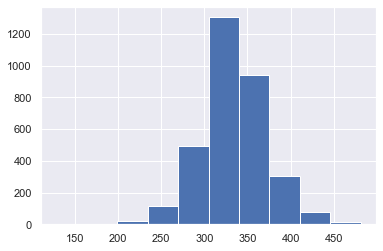

In [6]:
plt.hist(mdkn['Sulfate'])

ok let go to the classification part

In [7]:
#every single class from sklearn
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

this part is for object from the classes

In [12]:
susi=SVC(C=5, gamma=0.0001)
suit=SVC(C=5, gamma=0.0001)
sukn=SVC(C=5, gamma=0.0001)

In [13]:
knsi=KNeighborsClassifier()
knit=KNeighborsClassifier()
knkn=KNeighborsClassifier()

In [14]:
dtsi=DecisionTreeClassifier()
dtit=DecisionTreeClassifier()
dtkn=DecisionTreeClassifier()

In [15]:
rfsi=RandomForestClassifier()
rfit=RandomForestClassifier()
rfkn=RandomForestClassifier()

this part is for the train and test split

In [16]:
xsi=mdsi.drop('Potability',axis=1)
xit=mdi.drop('Potability',axis=1)
xkn=mdkn.drop('Potability',axis=1)
ysi=mdsi['Potability']
yit=mdi['Potability']
ykn=mdkn['Potability']

In [17]:
trsix,tesix,trsiy,tesiy=train_test_split(xsi,ysi)
tritx,teitx,trity,teity=train_test_split(xit,yit)
trknx,teknx,trkny,tekny=train_test_split(xkn,ykn)

this part is for training model

In [18]:
susi.fit(trsix,trsiy)
suit.fit(tritx,trity)
sukn.fit(trknx,trkny)

SVC(C=5, gamma=0.0001)

In [19]:
knsi.fit(trsix,trsiy)
knit.fit(tritx,trity)
knkn.fit(trknx,trkny)

KNeighborsClassifier()

In [20]:
dtsi.fit(trsix,trsiy)
dtit.fit(tritx,trity)
dtkn.fit(trknx,trkny)

DecisionTreeClassifier()

In [21]:
rfsi.fit(trsix,trsiy)
rfit.fit(tritx,trity)
rfkn.fit(trknx,trkny)

RandomForestClassifier()

this part is for predicting 

In [22]:
predsi=susi.predict(tesix)
predit=suit.predict(teitx)
predkn=sukn.predict(teknx)

In [23]:
prknsi=knsi.predict(tesix)
prknit=knit.predict(teitx)
prknkn=knkn.predict(teknx)

In [24]:
prdtsi=dtsi.predict(tesix)
prdtit=dtit.predict(teitx)
prdtkn=dtkn.predict(teknx)

In [25]:
prrfsi=rfsi.predict(tesix)
prrfit=rfit.predict(teitx)
prrfkn=rfkn.predict(teknx)

this part is for metrics and reports

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(predsi,tesiy))
print('\n')
print(confusion_matrix(predsi,tesiy))

              precision    recall  f1-score   support

         0.0       0.95      0.65      0.77       719
         1.0       0.24      0.78      0.36       100

    accuracy                           0.66       819
   macro avg       0.60      0.71      0.57       819
weighted avg       0.87      0.66      0.72       819



[[466 253]
 [ 22  78]]


In [28]:
print(classification_report(prknsi,tesiy))
print('\n')
print(confusion_matrix(prknsi,tesiy))

              precision    recall  f1-score   support

         0.0       0.76      0.62      0.68       593
         1.0       0.33      0.48      0.39       226

    accuracy                           0.58       819
   macro avg       0.54      0.55      0.54       819
weighted avg       0.64      0.58      0.60       819



[[370 223]
 [118 108]]


In [29]:
print(classification_report(prrfkn,tekny))
print('\n')
print(confusion_matrix(prrfkn,tekny))

              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90       588
         1.0       0.69      0.94      0.79       231

    accuracy                           0.86       819
   macro avg       0.83      0.89      0.85       819
weighted avg       0.89      0.86      0.87       819



[[491  97]
 [ 15 216]]


In [30]:
print(classification_report(prdtkn,tekny))
print('\n')
print(confusion_matrix(prdtkn,tekny))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       510
         1.0       0.98      0.99      0.99       309

    accuracy                           0.99       819
   macro avg       0.99      0.99      0.99       819
weighted avg       0.99      0.99      0.99       819



[[504   6]
 [  2 307]]


## till here we perform classifiying with tree methods 
1:support vector machine 
2:k-nearest neighbors
3:decision tree
4:random forest

## we get the best result from decison tree 
also it is worht to mention that we have done it with the base parameters each method has other than SVC

----------------------------------

## so far  we have used four methods and our imputer was simple imputer
## now we should compare the imputation methods to see which one is the best?!

#### we will use random forest for comparing the imputers

In [31]:
## this is for iterative imputer 
## this is all the predictions
prrfsi=rfsi.predict(tesix)
prrfit=rfit.predict(teitx)
prrfkn=rfkn.predict(teknx)

## and this is all the classifcation report and confusion matrix

In [38]:
print('this is the reports for random forest with simple imputer')
print('\n')
print(classification_report(prrfsi,tesiy))
print('\n')
print(confusion_matrix(prrfsi,tesiy))

this is the reports for random forest with simple imputer


              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88       591
         1.0       0.65      0.94      0.77       228

    accuracy                           0.84       819
   macro avg       0.81      0.87      0.82       819
weighted avg       0.88      0.84      0.85       819



[[475 116]
 [ 13 215]]


In [37]:
print('this is the reports for random forest with iterative imputer ')
print('\n')
print(classification_report(prrfit,tesiy))
print('\n')
print(confusion_matrix(prrfit,tesiy))

this is the reports for random forest with iterative imputer 


              precision    recall  f1-score   support

         0.0       0.70      0.59      0.64       580
         1.0       0.28      0.39      0.33       239

    accuracy                           0.53       819
   macro avg       0.49      0.49      0.49       819
weighted avg       0.58      0.53      0.55       819



[[343 237]
 [145  94]]


In [36]:
print('this is the reports for random forest with k-nearest neighbor imputer')
print('\n')
print(classification_report(prrfkn,tesiy))
print('\n')
print(confusion_matrix(prrfkn,tesiy))

this is the reports for random forest with k-nearest neighbor imputer


              precision    recall  f1-score   support

         0.0       0.70      0.59      0.64       588
         1.0       0.26      0.38      0.31       231

    accuracy                           0.53       819
   macro avg       0.48      0.48      0.47       819
weighted avg       0.58      0.53      0.55       819



[[344 244]
 [144  87]]


### conclusion :
as you can see simple imputer functions better than the others but it is true just in this project and it not true for any cases!!!